# Implementaciones

In [2]:
# Método de euler hacia adelante para ecuaciones diferenciales
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# Definimos una función euler que toma como argumentos:
def euler(f,a,b,n,y0): # Función, intervalo a,b donde se resuelve la ecuación, número de puntos y el valor de y0
    h = (b-a)/(n-1) # Se calcula el tamaño del paso h que se utilizará en el método
    xi = np.linspace(a,b,n) # generamos un array xi de n números igualmente espaciados entre a y b.
    yval = np.zeros(n) # Iniciamos un array en ceros para almacenar los valores de la solución en cada punto
    y = y0 # inicializamos y en y0
    for j,x in enumerate(xi): # ciclo que recorre j en cada valor de x en xi
        yval[j] = y # almacenamos el valor actual de y en un array de valores de y
        y = y + h*f(x, y) # Calculamos y actualizamos cada valor de y utilizando la fórmula
    return xi, yval # return los arreglos con los valores de x y los valores solución y

xi, yval = euler(f,a,b,n,y0) # Llamada de la función

In [3]:
# Método de Euler hacia atrás

# Utilizamos el método de bisección para encontrar la raíz de la ecuación implícita (y(i+1) - y(i) - h*f(x(i+1), y(i+1)) = 0)
def biseccion(f, a, b, x, y, h, tol=1e-6): # función, intervalo a,b donde se busca la raiz, valor de x donde se evalua, valor anterior de y, tolerancia
    c = a # Inicializamos el valor medio en a
    while ((b-a) >= tol): # Aseguramos la tolerancia definida
        c = (a+b)/2 # Método de bisección, se actualiza el valor de c
        if (c - y - h*f(x, c) == 0.0): # Verificamos si se ha encontrado una raíz de la ecuación
            break # Si es asi, se rompe el bucle
        elif ((c - y - h*f(x, c))*(a - y - h*f(x, a)) < 0): # Cambio de signos
            b = c # Se actualiza el valor a b
        else:
            a = c # El valor se actualiza a a
    return c # Return raiz encontrada

def euler_atras(f, a, b, n, y0): # función para el método
    h = (b-a)/(n-1) # tamaño del peso
    x = np.linspace(a, b, n) # x será un arreglo de n números equi espaciados entre a y b
    y = np.zeros(n) # y será un arreglo de ceros donde se irán almacenando los resultados
    y[0] = y0 # iniciamos en y0

    for i in range(n-1): # se ejecuta un ciclo n-1 veces porque este método ocupa el valor de y(i+1) para calcular y(i)
        # Se calcula el valor de la y siguiente
        # La función bisección recibe como entrada la función, el valor de y actual, el valor de y en el paso siguiente, el valor de x siguiente
        # el ahora valor actual de y y el tamaño del paso
        y[i+1] = biseccion(f, y[i], y[i] + h*f(x[i], y[i]), x[i+1], y[i], h)

    return x, y # return, los arreglos que contienen los valores  de x y y

x, y = euler_atras(f, a, b, n, y0) # llamada de la función

In [4]:
# Método Runge-Kutta de cuarto orden (RK4)
def rk4(f, a, b, n, y0):
    h = (b-a)/(n-1)
    x = np.linspace(a, b, n)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, y

xs, ys = rk4(f, a, b, n, y0)

# Ejercicio 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# np.exp(x) / (1 + np.exp(x)*y)
# Definir la función para la ecuación diferencial
def f(x, y):
    return np.exp(x)/((1+np.exp(x))*y)

# Parámetros iniciales
a = 0
b = 1
n = 100
y0 = 0.1

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)
print(yval)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)
print(y)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)
print(ys)

[0.1        0.15050505 0.18423158 0.21192237 0.23611529 0.25793735
 0.27801206 0.29672888 0.31435098 0.33106623 0.34701444 0.36230304
 0.37701669 0.39122355 0.40497944 0.41833078 0.43131664 0.44397032
 0.45632041 0.46839171 0.4802059  0.49178203 0.50313699 0.51428579
 0.52524187 0.5360173  0.54662298 0.55706879 0.5673637  0.5775159
 0.58753291 0.5974216  0.60718831 0.61683888 0.62637873 0.63581286
 0.64514593 0.65438228 0.66352594 0.6725807  0.68155008 0.6904374
 0.69924576 0.70797808 0.71663712 0.72522546 0.73374554 0.74219969
 0.75059007 0.75891877 0.76718773 0.77539882 0.78355381 0.79165437
 0.7997021  0.80769851 0.81564507 0.82354314 0.83139405 0.83919905
 0.84695935 0.85467611 0.86235041 0.86998331 0.87757583 0.88512893
 0.89264354 0.90012055 0.90756082 0.91496517 0.92233439 0.92966925
 0.93697046 0.94423875 0.95147477 0.9586792  0.96585266 0.97299575
 0.98010906 0.98719316 0.99424859 1.00127588 1.00827553 1.01524805
 1.02219391 1.02911356 1.03600745 1.04287601 1.04971966 1.056538

In [5]:
c = -1.37629
anl = lambda x: np.sqrt(2*np.log(1+np.exp(x))+c)

# Calcular la solución analítica
yval_analitica = anl(xi)
print(yval_analitica)

[0.1000218  0.14188333 0.17409311 0.2013379  0.22542514 0.24727926
 0.26744823 0.28628839 0.30404685 0.32090319 0.33699279 0.35242064
 0.36727011 0.38160868 0.39549189 0.40896606 0.42207034 0.43483812
 0.44729816 0.45947546 0.47139188 0.48306666 0.49451688 0.50575773
 0.51680281 0.52766437 0.53835345 0.54888007 0.55925334 0.56948159
 0.57957243 0.58953285 0.59936929 0.60908769 0.61869355 0.62819196
 0.63758766 0.64688506 0.65608826 0.66520111 0.67422719 0.68316988
 0.69203234 0.70081753 0.70952826 0.71816716 0.72673671 0.73523928
 0.74367707 0.75205219 0.76036664 0.76862231 0.77682099 0.7849644
 0.79305415 0.8010918  0.80907881 0.8170166  0.8249065  0.83274979
 0.8405477  0.8483014  0.85601201 0.86368059 0.87130819 0.87889578
 0.88644431 0.89395468 0.90142777 0.90886441 0.91626541 0.92363153
 0.93096354 0.93826213 0.945528   0.95276182 0.95996423 0.96713584
 0.97427725 0.98138903 0.98847174 0.99552592 1.00255209 1.00955073
 1.01652235 1.0234674  1.03038634 1.03727961 1.04414763 1.05099

<Figure size 640x480 with 0 Axes>

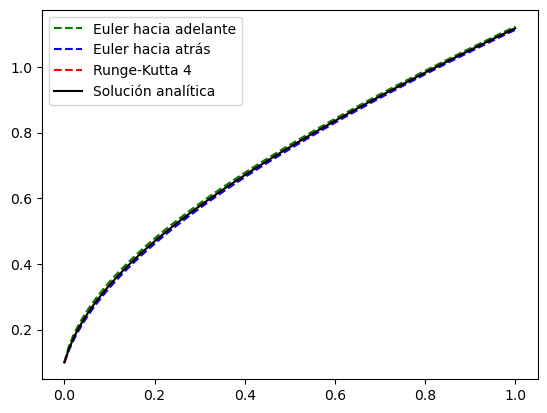

In [6]:
plt.figure()
fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()
plt.close()

# Ejercicio 2

In [10]:
def f(x, y):
    return (x-y)/x

# Parámetros iniciales
a = 1
b = 2
n = 100
y0 = 1

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)
print(yval)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)
print(y)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)
print(ys)

[1.         1.         1.00010101 1.00030003 1.00059418 1.00098068
 1.00145688 1.0020202  1.00266819 1.00339847 1.00420875 1.00509684
 1.00606061 1.00709801 1.00820707 1.00938589 1.01063264 1.01194554
 1.01332288 1.01476301 1.01626434 1.01782531 1.01944444 1.02112029
 1.02285147 1.02463661 1.02647442 1.02836364 1.03030303 1.03229142
 1.03432765 1.03641062 1.03853924 1.04071247 1.04292929 1.04518873
 1.04748982 1.04983165 1.05221331 1.05463393 1.05709267 1.05958869
 1.06212121 1.06468945 1.06729264 1.06993007 1.07260101 1.07530477
 1.07804068 1.08080808 1.08360633 1.08643482 1.08929293 1.09218008
 1.09509569 1.09803922 1.1010101  1.10400782 1.10703186 1.11008171
 1.11315689 1.11625691 1.11938131 1.12252964 1.12570146 1.12889633
 1.13211382 1.13535354 1.13861507 1.14189802 1.14520202 1.14852669
 1.15187166 1.15523658 1.15862109 1.16202487 1.16544758 1.16888889
 1.17234848 1.17582606 1.1793213  1.18283393 1.18636364 1.18991015
 1.19347319 1.19705249 1.20064778 1.2042588  1.2078853  1.2115

In [11]:
c = -0.5
anl = lambda x: (x/2)-(c/x)

# Calcular la solución analítica
yval_analitica = anl(xi)
print(yval_analitica)

[1.         1.00005051 1.00020002 1.00044563 1.00078454 1.00121406
 1.0017316  1.00233467 1.00302086 1.00378788 1.00463349 1.00555556
 1.00655201 1.00762085 1.00876017 1.0099681  1.01124286 1.01258272
 1.01398601 1.01545112 1.01697649 1.01856061 1.02020202 1.02189932
 1.02365115 1.02545617 1.02731313 1.02922078 1.03117792 1.0331834
 1.03523608 1.03733489 1.03947876 1.04166667 1.04389762 1.04617066
 1.04848485 1.05083928 1.05323306 1.05566535 1.05813531 1.06064214
 1.06318504 1.06576327 1.06837607 1.07102273 1.07370254 1.07641483
 1.07915894 1.08193421 1.08474002 1.08757576 1.09044083 1.09333466
 1.09625668 1.09920635 1.10218312 1.10518648 1.10821592 1.11127094
 1.11435106 1.11745581 1.12058473 1.12373737 1.1269133  1.1301121
 1.13333333 1.13657661 1.13984153 1.14312771 1.14643476 1.14976233
 1.15311005 1.15647757 1.15986454 1.16327064 1.16669553 1.17013889
 1.17360041 1.17707979 1.18057672 1.18409091 1.18762208 1.19116994
 1.19473423 1.19831467 1.201911   1.20552297 1.20915033 1.212792

<Figure size 640x480 with 0 Axes>

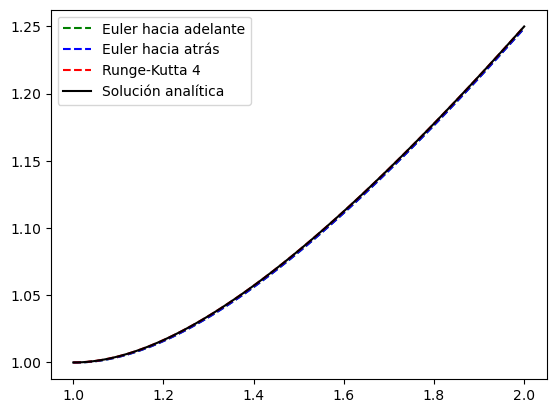

In [12]:
plt.figure()

fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()

plt.close()

# Ejercicio 3

In [52]:
def f(x, y):
    return ((x**3)-x-4*y)/x

# Parámetros iniciales
a = 1
b = 10
n = 100
y0 = 5

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)
print(yval)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)
print(y)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)
print(ys)

[  5.           3.18181818   2.13849236   1.51655782   1.1396042
   0.91384648   0.78681236   0.72790093   0.71866207   0.74768034
   0.80776111   0.89432258   1.00444575   1.13629597   1.28876154
   1.46122236   1.65339863   1.86525009   2.0969075    2.34862554
   2.62074969   2.91369288   3.22791853   3.56392841   3.92225353
   4.30344752   4.70808158   5.13674066   5.5900206    6.06852587
   6.57286788   7.10366356   7.66153439   8.2471055    8.861005
   9.50386349  10.1763136   10.87898967  11.6125274   12.37756373
  13.17473654  14.00468458  14.86804728  15.76546469  16.69757736
  17.66502628  18.66845281  19.70849864  20.78580574  21.9010163
  23.05477274  24.24771765  25.48049377  26.753744    28.06811133
  29.42423888  30.82276986  32.26434755  33.7496153   35.27921654
  36.85379474  38.47399343  40.14045619  41.85382662  43.61474837
  45.42386513  47.28182058  49.18925847  51.14682256  53.1551566
  55.21490441  57.32670978  59.49121654  61.70906853  63.98090961
  66.30738362  

In [53]:
c = 1
anl = lambda x: ((x**3)/7)-(x/5)+(c/(x**4))

# Calcular la solución analítica
yval_analitica = anl(xi)
print(yval_analitica)

[  0.94285714   0.67335235   0.51206399   0.42108719   0.37871873
   0.37212133   0.39352198   0.43814981   0.5030723    0.58651537
   0.68745372   0.80535714   0.94002963   1.09150494   1.25997747
   1.44575574   1.64923042   1.87085213   2.11111577   2.37054928
   2.64970555   2.94915648   3.26948854   3.61129954   3.97519612
   4.3617919    4.77170599   5.20556191   5.66398671   6.14761031
   6.65706491   7.19298464   7.75600515   8.34676339   8.96589736
   9.61404594  10.29184874  10.99994601  11.73897849  12.50958738
  13.31241424  14.14810096  15.01728968  15.92062279  16.85874286
  17.83229265  18.84191505  19.8882531   20.97194992  22.09364876
  23.25399292  24.45362581  25.69319087  26.97333162  28.29469161
  29.65791446  31.06364381  32.51252333  34.00519673  35.54230776
  37.12450016  38.75241773  40.42670425  42.14800355  43.91695945
  45.73421582  47.60041649  49.51620535  51.48222627  53.49912314
  55.56753986  57.68812033  59.86150846  62.08834817  64.36928337
  66.70495

<Figure size 640x480 with 0 Axes>

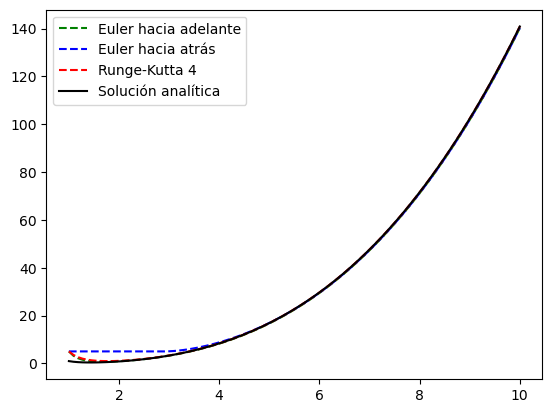

In [56]:
plt.figure()

fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()

plt.close()

# Ejercicio 4

In [27]:
def f(x, y):
    return -(x**3+x*y**2)/((x**2)*y+y**3)

# Parámetros iniciales
a = -1
b = 1
n = 100
y0 = 0.1

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)
print(yval)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)
print(y)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)
print(ys)

[0.1        0.3020202  0.36755853 0.42030054 0.46545313 0.50534873
 0.5412871  0.57408539 0.60429896 0.63232656 0.65846642 0.68294876
 0.70595588 0.72763508 0.74810749 0.76747411 0.78582026 0.80321874
 0.81973224 0.8354152  0.85031523 0.8644742  0.87792916 0.89071304
 0.90285525 0.91438213 0.92531736 0.9356823  0.94549625 0.95477668
 0.96353945 0.97179897 0.97956833 0.98685942 0.9936831  1.0000492
 1.00596667 1.01144363 1.01648743 1.0211047  1.02530141 1.02908289
 1.03245389 1.03541858 1.03798063 1.04014316 1.04190883 1.0432798
 1.04425778 1.04484401 1.04503932 1.04484405 1.04425814 1.04328108
 1.04191192 1.04014924 1.03799122 1.03543552 1.03247936 1.02911946
 1.02535201 1.02117269 1.0165766  1.01155826 1.00611158 1.00022976
 0.99390533 0.98713003 0.97989478 0.97218962 0.96400359 0.95532469
 0.94613973 0.93643426 0.92619237 0.91539657 0.90402762 0.89206424
 0.87948292 0.86625758 0.85235919 0.83775535 0.82240979 0.80628163
 0.78932469 0.77148641 0.75270666 0.73291616 0.71203443 0.689967

In [28]:
c = 1
anl = lambda x: np.sqrt(c-x**2)

# Calcular la solución analítica
yval_analitica = anl(xi)
print(yval_analitica)

[0.         0.1999898  0.28138158 0.34283965 0.39380987 0.43796936
 0.4772126  0.5126698  0.54508031 0.57495957 0.6026842  0.62853936
 0.65274725 0.67548499 0.6968965  0.71710058 0.73619665 0.75426888
 0.77138922 0.78761975 0.80301442 0.81762046 0.83147942 0.84462808
 0.85709913 0.86892174 0.88012206 0.89072354 0.90074735 0.91021255
 0.91913642 0.92753457 0.93542116 0.94280904 0.94970984 0.95613411
 0.96209139 0.9675903  0.97263864 0.97724336 0.98141073 0.98514629
 0.98845494 0.99134094 0.99380799 0.9958592  0.99749712 0.99872381
 0.99954076 0.99994898 0.99994898 0.99954076 0.99872381 0.99749712
 0.9958592  0.99380799 0.99134094 0.98845494 0.98514629 0.98141073
 0.97724336 0.97263864 0.9675903  0.96209139 0.95613411 0.94970984
 0.94280904 0.93542116 0.92753457 0.91913642 0.91021255 0.90074735
 0.89072354 0.88012206 0.86892174 0.85709913 0.84462808 0.83147942
 0.81762046 0.80301442 0.78761975 0.77138922 0.75426888 0.73619665
 0.71710058 0.6968965  0.67548499 0.65274725 0.62853936 0.6026

<Figure size 640x480 with 0 Axes>

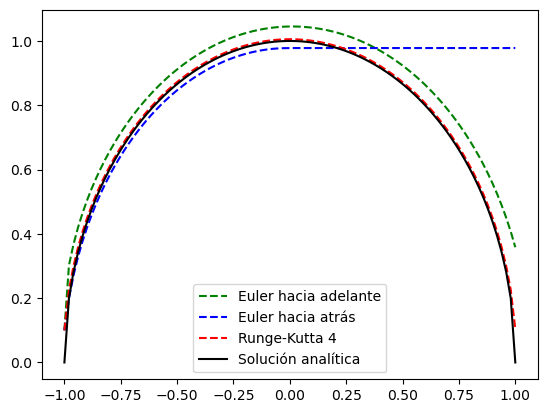

In [29]:
plt.figure()

fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()

plt.close()